In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2DTranspose
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

Label: frog
Data: 


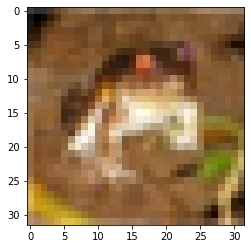

Label: truck
Data: 


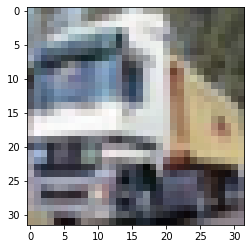

Label: truck
Data: 


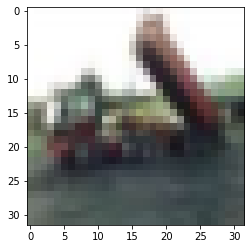

In [ ]:
"""Import, normalize, and view the data"""

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(3):
    print("Label: " + str(classes[train_labels[i][0]]))
    print("Data: ")
    plt.imshow(train_images[i])
    plt.show()

In [ ]:
"""Define and compile a model based on ResNet50"""

# modify base ResNet50 model to include a 128x128x3 input with a new 10 element classification layer
model_base = ResNet50(include_top=False, input_shape=(128, 128, 3), pooling='max')
output = Dense(10, activation='softmax')(model_base.output)
resnet = Model(model_base.input, output)

# add upsampling layers to resnet 
model = Sequential([
                    Conv2DTranspose(3, (3, 3), strides=2, padding='same', activation='relu', input_shape=(32,32,3)),
                    Conv2DTranspose(3, (3, 3), strides=2, padding='same', activation='relu'),
                    resnet
])

model.compile(optimizer='SGD', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy', 'mse'])

model.summary()
resnet.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_9 (Conv2DTr (None, 64, 64, 3)         84        
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 128, 128, 3)       84        
_________________________________________________________________
functional_12 (Functional)   (None, 10)                23608202  
Total params: 23,608,370
Trainable params: 23,555,250
Non-trainable params: 53,120
_________________________________________________________________
Model: "functional_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 128, 128, 3) 0                                            
_______________________________________________